Data can be obtained from the UCL repository

    - Fixed acidity : amount of fixed acids in the wine usually a combination of tartaric, malic and citric acids
    - volatile acidity : amount of volatile acids in the wine, primarily acetic acid
    - residual_sugar : amount of sugar remaining after fermentation
    - chlorides : amount of chlorides in the wine, which indicate presence of salts
    - free_sulfur_dioxide : amount of free sulfur dioxide in the wine, used as a preservative
    - total_sulfur_dioxide : total amount of sulfure dioxide, including bound and free froms
    - density : density of wine, related to sugar and alcohol contents
    - ph : ph level of wine indicating its acidity
    - sulphates : amount of sulphates in the wine, contributing to its taste and preservation
    - alcohol : alcohol content of the wine in percentage
    - quality : quality of the wine indicated from 3-9 with higher values indicating better quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("wine_data.csv")

## EXPLORATORY DATA ANALYSIS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [4]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [5]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
data.shape

(21000, 12)

In [7]:
data.groupby('quality').size()

quality
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
dtype: int64

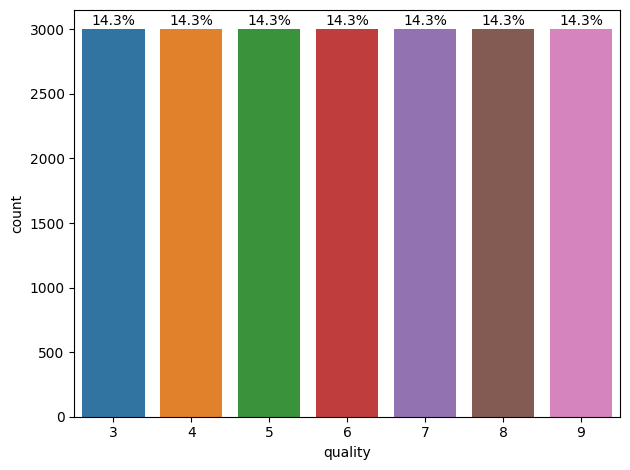

In [8]:
#visualite target
ax = sns.countplot(data = data,x=data.quality)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [9]:
### reduce the quality rating to only two where 
#3,4,5,6 -- 0(poor)
#7,8,9 -- 1(good)

In [10]:
data['quality_changed'] = np.where(data['quality']>6,1,0)

In [11]:
data.groupby(['quality','quality_changed']).size()

quality  quality_changed
3        0                  3000
4        0                  3000
5        0                  3000
6        0                  3000
7        1                  3000
8        1                  3000
9        1                  3000
dtype: int64

In [12]:
#drop the original quality column and rename the newly created one
data = data.drop(['quality'],axis = 1)
data.rename(columns = {'quality_changed':'quality'},inplace=True)

In [13]:
data.groupby('quality').size()

quality
0    12000
1     9000
dtype: int64

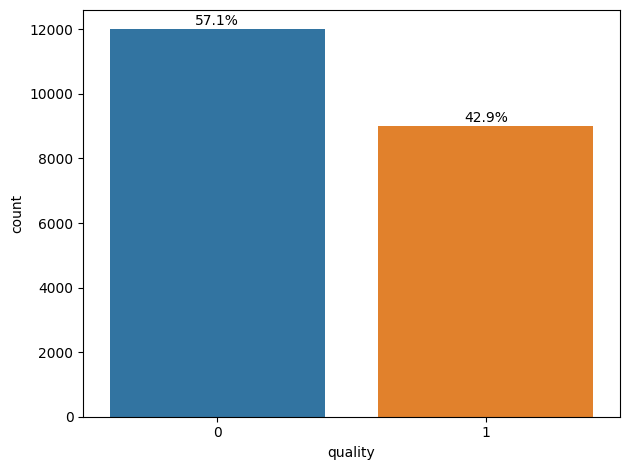

In [14]:
#visualite new target
ax = sns.countplot(data = data,x=data.quality)
total = len(data)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

In [15]:
cols = data.columns
print(cols)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


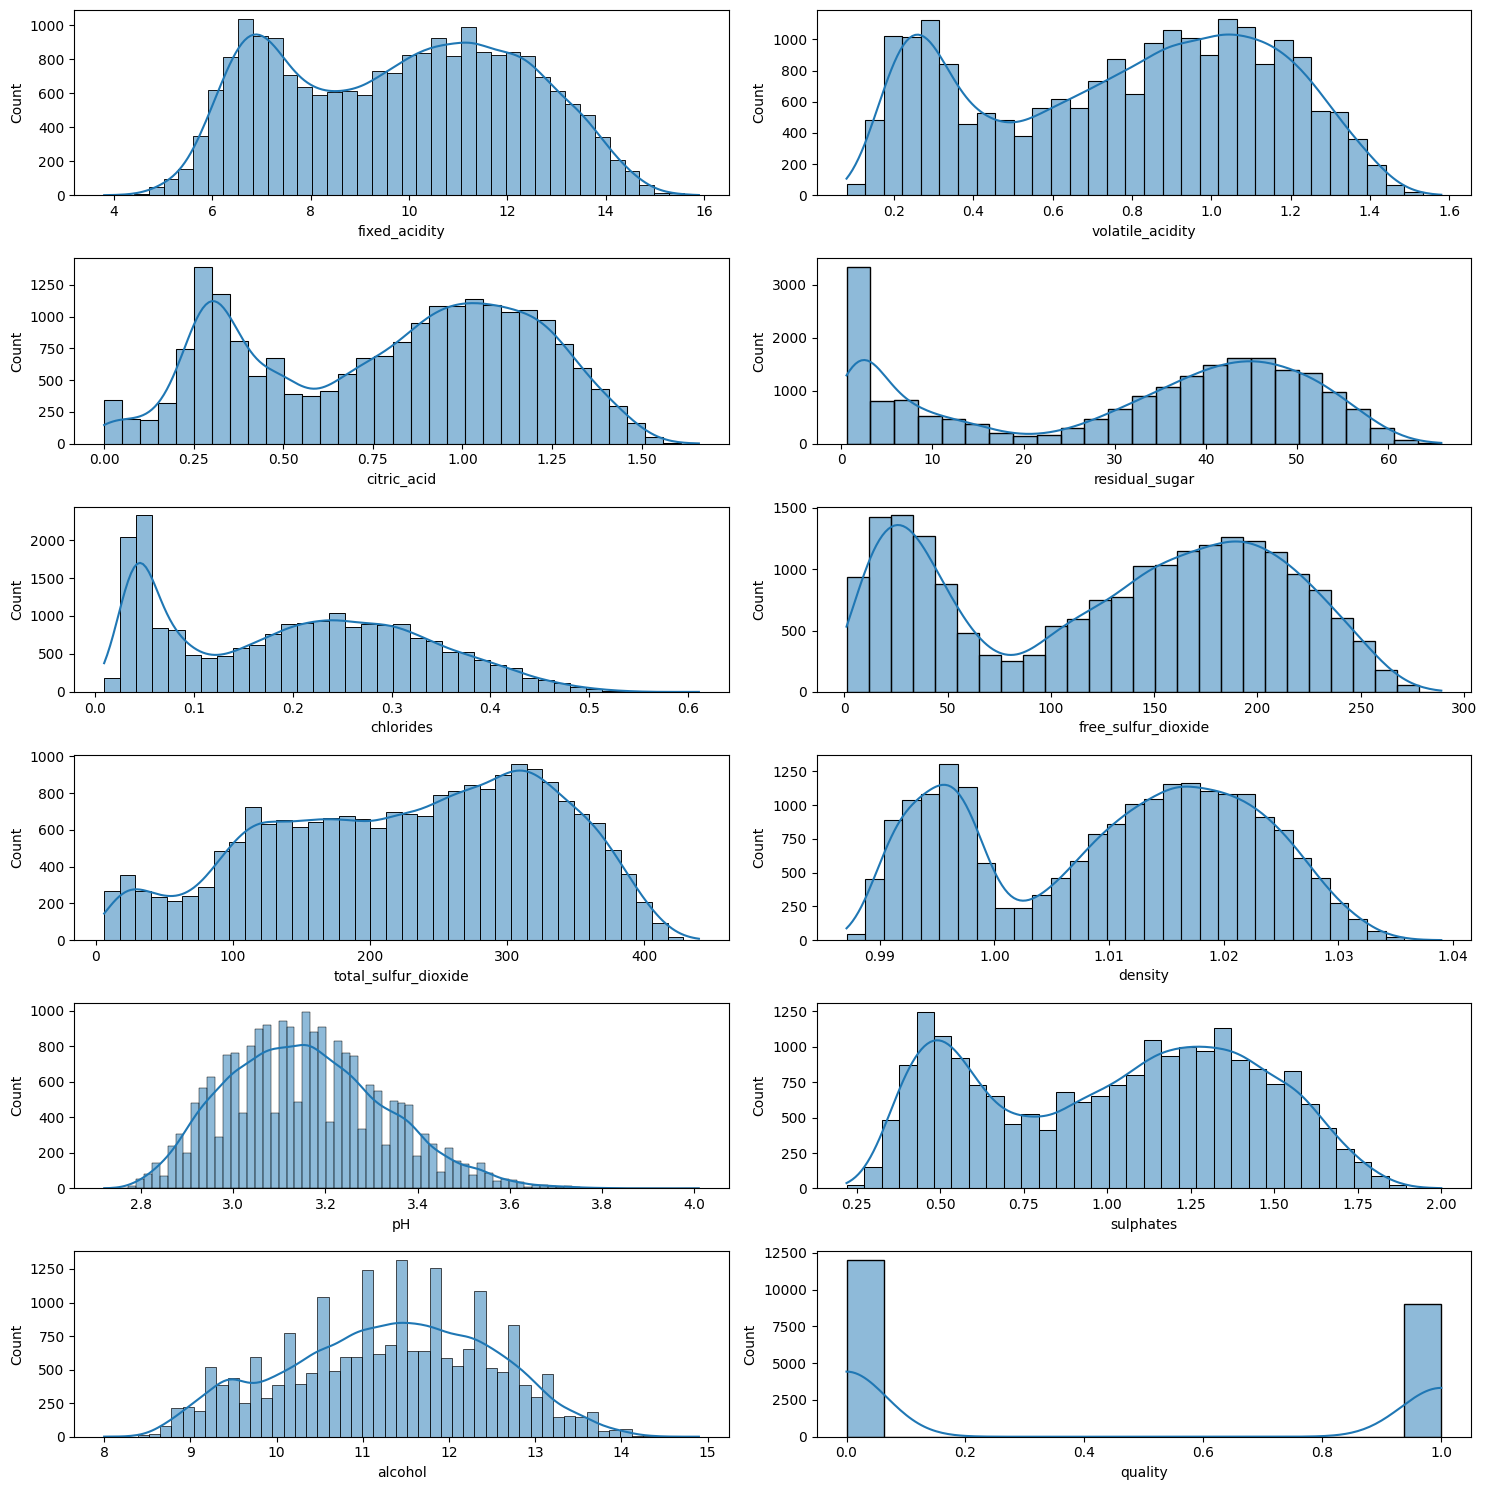

In [16]:
#histplot for the columns analysis
fig = plt.subplots(figsize=(15,15))
for i,j in enumerate(cols):
    plt.subplot(6,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.histplot(data = data,x=j,kde=True)
plt.tight_layout()

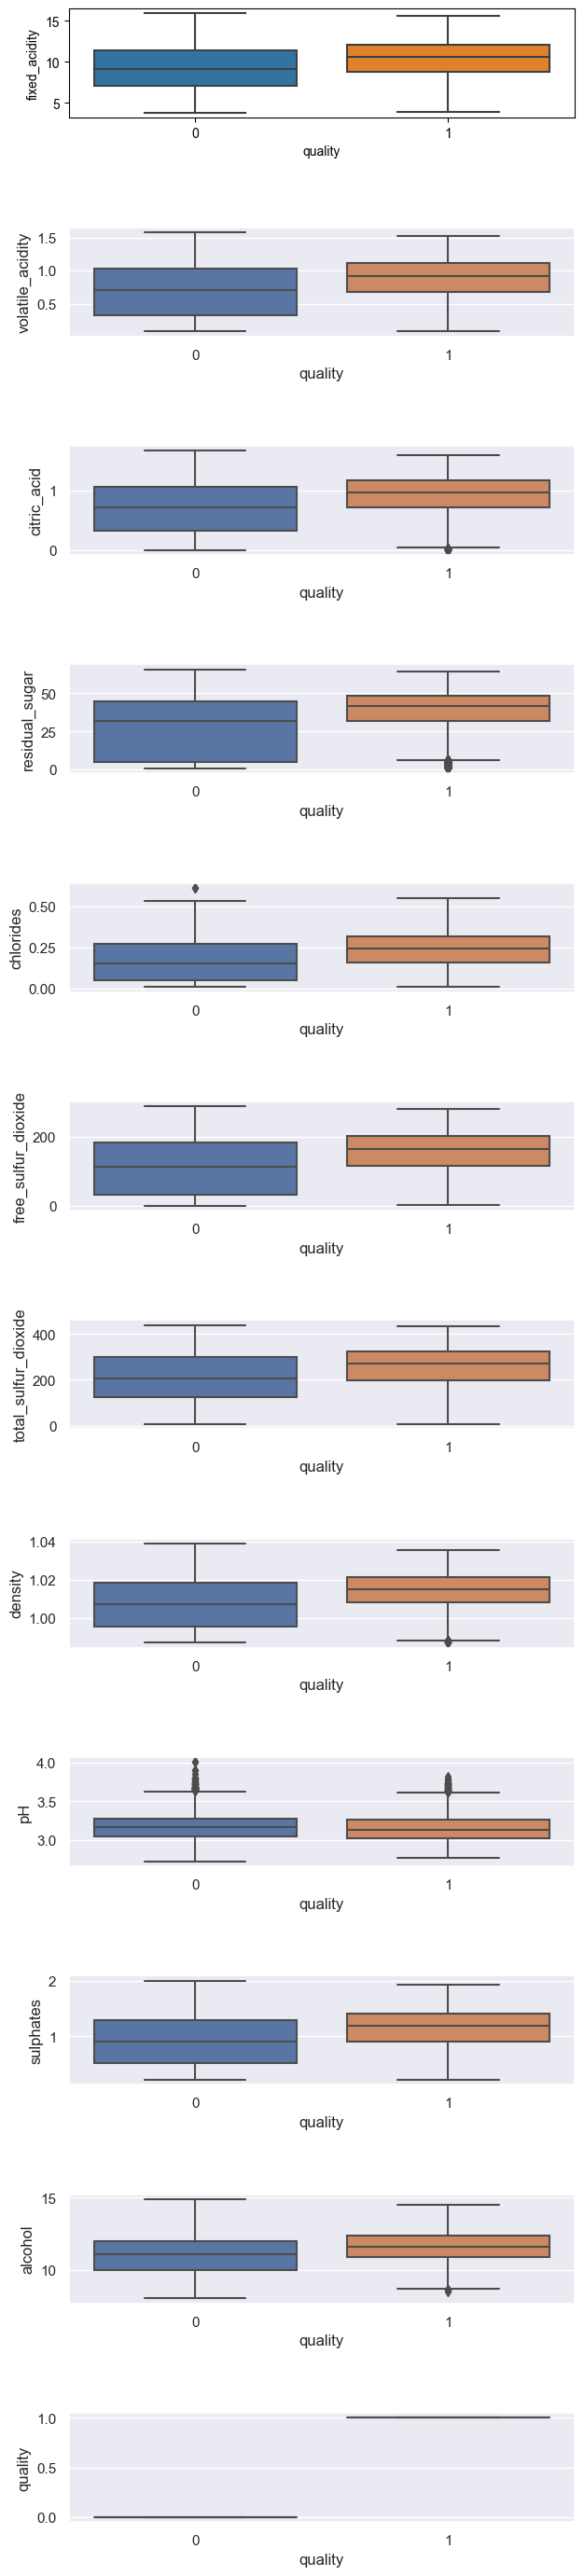

In [17]:
plt.figure(figsize=(7,35))
for i,j in enumerate(data.columns):
    plt.subplot(12,1,i+1)
    plt.subplots_adjust(hspace=1.0)
    ax = sns.boxplot(data = data, y= j, x = data.quality)
    sns.set(font_scale=1.0)

In [18]:
#Good quality wines are seen to have more acidity, sugar, chlorides and density
#The PH does not seem to have any effect on the quality of the wine

<Axes: >

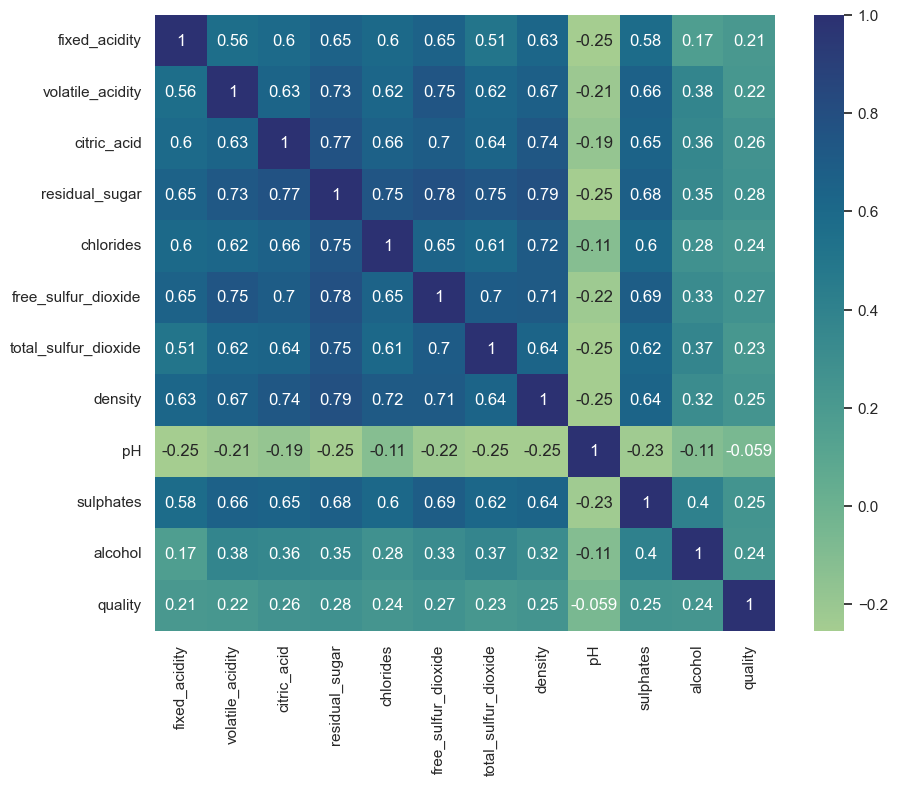

In [19]:
#heatmap to show correlations
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='crest',annot=True)

In [20]:
#using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(data):
    vif = pd.DataFrame()
    vif['variables'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif
    

In [21]:
vif(data)

,variables,VIF
0,fixed_acidity,37.908954
1,volatile_acidity,15.324658
2,citric_acid,14.721096
3,residual_sugar,17.969785
4,chlorides,9.153121
5,free_sulfur_dioxide,14.101967
6,total_sulfur_dioxide,16.278290
7,density,561.992520
8,pH,368.290428
9,sulphates,17.958684


In [22]:
#very High correlation noted for alcohol,ph,density

## TRAIN TEST SPLIT AND SCALING

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [24]:
#drop the PH column as it did not show a significance effect on the quality of wine during exploratory analysis
data = data.drop('pH',axis = 1)

In [25]:
x = data.drop('quality',axis = 1)
y = data['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,random_state=42,test_size = 0.3)

In [26]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(14700, 10) (6300, 10) (14700,) (6300,)


In [27]:
scale = StandardScaler()

In [28]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

## MODELLING

In [29]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,classification_report

**1. XGBOOST**

In [30]:
xgb = XGBClassifier()
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [31]:
preds = xgb.predict(x_test_scaled)

In [32]:
xgb_accuracy = accuracy_score(y_test,preds)
print("XGBOOST ACCURACY SCORE",xgb_accuracy)

XGBOOST ACCURACY SCORE 0.7346031746031746


In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      3625
           1       0.68      0.71      0.70      2675

    accuracy                           0.73      6300
   macro avg       0.73      0.73      0.73      6300
weighted avg       0.74      0.73      0.74      6300



Text(17.25, 0.5, 'True labels')

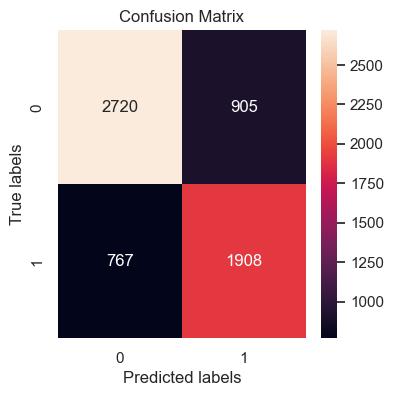

In [34]:
#plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(y_test,preds),annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

**2.RANDOM FOREST**

In [35]:
rf = RandomForestClassifier()

In [36]:
rf.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [37]:
rf_preds = rf.predict(x_test_scaled)
rf_accuracy = accuracy_score(rf_preds,y_test)
print("random forest accuracy",rf_accuracy)

random forest accuracy 0.7817460317460317


In [38]:
print(classification_report(rf_preds,y_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      3462
           1       0.77      0.73      0.75      2838

    accuracy                           0.78      6300
   macro avg       0.78      0.78      0.78      6300
weighted avg       0.78      0.78      0.78      6300



Text(17.25, 0.5, 'True labels')

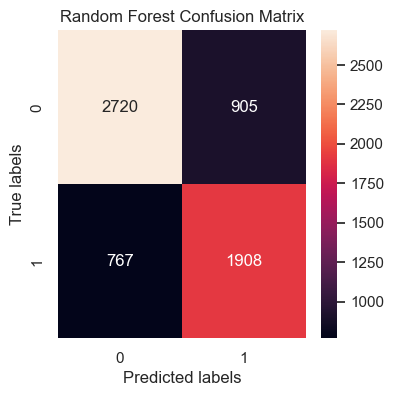

In [39]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(y_test,preds),annot=True,fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

**3. LOGISTIC REGRESSION**

In [40]:
lr = LogisticRegression(random_state=42)

In [41]:
lr.fit(x_train_scaled,y_train)

LogisticRegression(random_state=42)

In [42]:
lr_preds = lr.predict(x_test_scaled)

In [43]:
log_accuracy = accuracy_score(y_test,lr_preds)
print("LOGISTIC CLASSIFIER ACCURACY SCORE",log_accuracy)

LOGISTIC CLASSIFIER ACCURACY SCORE 0.6003174603174604


In [44]:
print(classification_report(y_test,lr_preds))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      3625
           1       0.53      0.55      0.54      2675

    accuracy                           0.60      6300
   macro avg       0.59      0.59      0.59      6300
weighted avg       0.60      0.60      0.60      6300



**4. LIGHTGBM**

In [45]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train_scaled,y_train)

LGBMClassifier(random_state=42)

In [46]:
lgb_preds = lgb_model.predict(x_test_scaled)
lgt_accuracy = accuracy_score(y_test,lgb_preds)
print("LIGHTGBM CLASSIFIER ACCURACY SCORE",lgt_accuracy)
print(classification_report(y_test,lgb_preds))

LIGHTGBM CLASSIFIER ACCURACY SCORE 0.7014285714285714
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      3625
           1       0.62      0.75      0.68      2675

    accuracy                           0.70      6300
   macro avg       0.70      0.71      0.70      6300
weighted avg       0.72      0.70      0.70      6300



In [47]:
results = pd.DataFrame({
    'Model': ['XG-BOOST','RANDOM FOREST', 'LOGISTIC','LIGHTGBM'],
    'Accuracy Score': [xgb_accuracy,rf_accuracy,log_accuracy,lgt_accuracy]})

result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df = result_df.set_index('Accuracy Score')
result_df

,Model
Accuracy Score,
0.781746,RANDOM FOREST
0.734603,XG-BOOST
0.701429,LIGHTGBM
0.600317,LOGISTIC


**RANDOM FOREST IS CHOSEN AS THE BEST MODEL FOR USE AS IT HAS THE HIGHEST ACCURACY SCORE**

Text(0.5, 0, 'Variable Significance Levels')

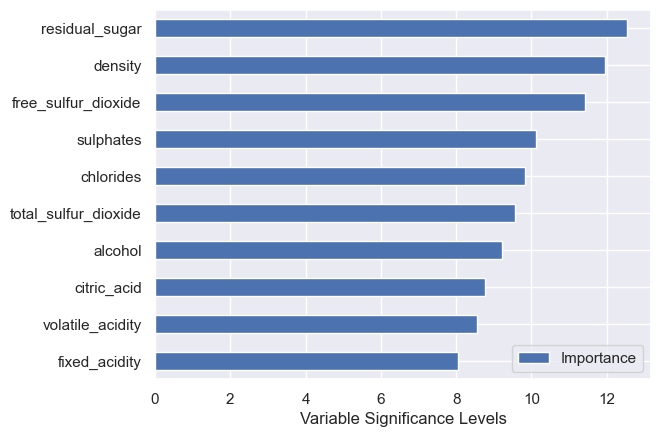

In [48]:
#feature importance for random forest
importance = pd.DataFrame({"Importance": rf.feature_importances_*100},index = x.columns).nlargest(n=10, columns=['Importance'])
importance = importance.sort_values(by = "Importance",axis = 0,ascending = True)
importance.plot(kind ="barh")

plt.xlabel("Variable Significance Levels")